In [1]:
import pandas as pd
import re
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
import os
pwd = os.getcwd()

In [4]:
df = pd.read_csv(os.path.basename(pwd +'/train.tsv'), sep='\t')

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

In [7]:
df.price.describe()

count    846982.000000
mean         30.917965
std          44.742851
min           0.000000
25%          12.000000
50%          20.000000
75%          34.000000
max        2009.000000
Name: price, dtype: float64

In [8]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.


<AxesSubplot:ylabel='Frequency'>

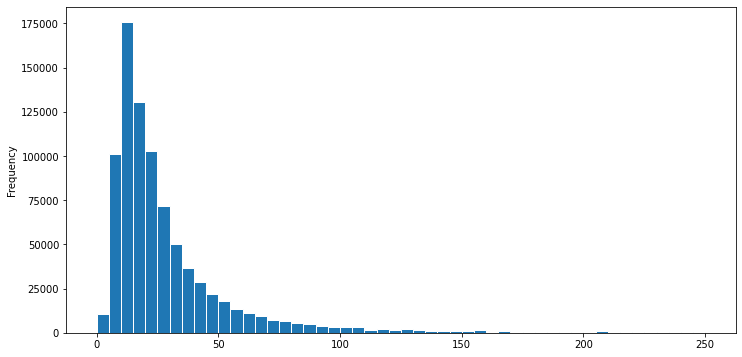

In [9]:
# sns.distplot( df_train["price"])
df["price"].plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])

The price of items are right skewed, vast majority of the items priced at 10–20. Thats why I will be doing log-transformation on the price.

<AxesSubplot:ylabel='Frequency'>

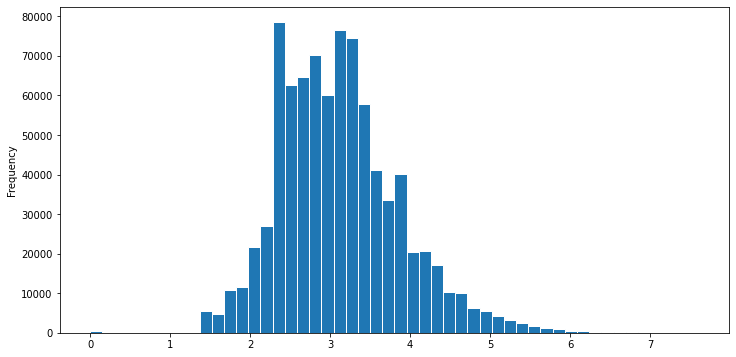

In [10]:
np.log(df['price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')

In [11]:
# ax = sns.countplot(x="price",hue='category_name' , data=df_train)
df.category_name.nunique() # unique values in category name column

914

In [12]:
df.category_name.value_counts()[:10]

Women/Athletic Apparel/Pants, Tights, Leggings    36456
Women/Tops & Blouses/T-Shirts                     32648
Beauty/Makeup/Face                                24706
Electronics/Video Games & Consoles/Games          19851
Beauty/Makeup/Lips                                18967
Women/Athletic Apparel/Shorts                     16844
Women/Underwear/Bras                              16058
Women/Tops & Blouses/Tank, Cami                   14570
Beauty/Makeup/Eyes                                13738
Men/Shoes/Athletic                                13458
Name: category_name, dtype: int64

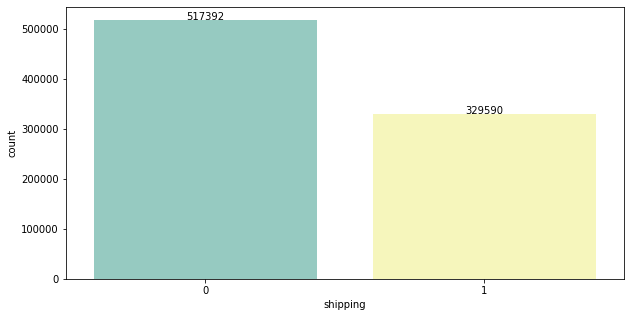

In [13]:
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x='shipping', data=df,palette="Set3")
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [14]:
shipping_fee_by_buyer  = df.loc[df['shipping'] == 0, 'price']
shipping_fee_by_seller = df.loc[df['shipping'] == 1, 'price']

In [15]:
print('The average price is {}'.format(round(shipping_fee_by_seller.mean(), 2)), 'if seller pays shipping')
print('The average price is {}'.format(round(shipping_fee_by_buyer.mean(), 2)), 'if buyer pays shipping')

The average price is 27.12 if seller pays shipping
The average price is 33.34 if buyer pays shipping


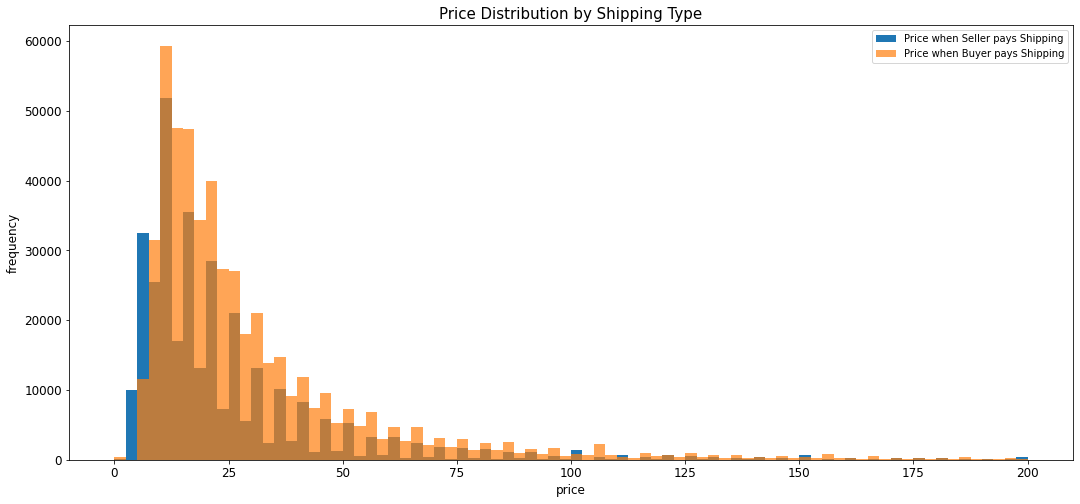

In [16]:
fig, ax = plt.subplots(figsize=(18,8))

ax.hist(shipping_fee_by_seller, alpha=1.0, bins=80, range = [0, 200],
       label='Price when Seller pays Shipping')
ax.hist(shipping_fee_by_buyer, alpha=0.7, bins=80, range = [0, 200],
       label='Price when Buyer pays Shipping')

plt.xlabel('price', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)

plt.tick_params(labelsize=12)
plt.legend()
plt.show()

In [17]:
test = df['price']
# df.drop(['price'],axis=1, inplace=True)
y = np.log1p(df["price"])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    test,
                                                    test_size=0.3)